In [1]:
'''
p_dict dictionary values:

The atomic element, 'Elem' with values 'Rb', 'Cs', 'K' and 'Na'.
The 'Dline' with values 'D1' and 'D2'
The temperature in Celsius, 'T', length of cell in mm, 'lcell', magnetic field in Gauss, 'Bfield', and magnetic field angle to propagation direction in radians 'Btheta' whose values are numbers.
Additional homogeoneous broadening in MHz 'GammaBuf' and shifts in MHz 'shift' due to buffer gases whose values are numbers.

If unspecified, isoptic fraction will be natural abundance.
To specify the isotopic fraction of rubidium, define the percentage of 85Rb, 'rb85frac' whose value is a number between 0 and 100.
To specify the isotopic fraction of potassium, define the percentage of 40K, 'K40frac' and 41K, 'K40frac' whose values are numbers between 0 and 100.


AN ADDITIONAL NOTEBOOK FOR FITTING DATA can be found at https://github.com/durham-qlm/scope2elecsus
'''

"\np_dict dictionary values:\n\nThe atomic element, 'Elem' with values 'Rb', 'Cs', 'K' and 'Na'.\nThe 'Dline' with values 'D1' and 'D2'\nThe temperature in Celsius, 'T', length of cell in mm, 'lcell', magnetic field in Gauss, 'Bfield', and magnetic field angle to propagation direction in radians 'Btheta' whose values are numbers.\nAdditional homogeoneous broadening in MHz 'GammaBuf' and shifts in MHz 'shift' due to buffer gases whose values are numbers.\n\nIf unspecified, isoptic fraction will be natural abundance.\nTo specify the isotopic fraction of rubidium, define the percentage of 85Rb, 'rb85frac' whose value is a number between 0 and 100.\nTo specify the isotopic fraction of potassium, define the percentage of 40K, 'K40frac' and 41K, 'K40frac' whose values are numbers between 0 and 100.\n\n\nAN ADDITIONAL NOTEBOOK FOR FITTING DATA can be found at https://github.com/durham-qlm/scope2elecsus\n"

In [2]:
from elecsus.libs.spectra import get_spectra
import numpy as np
import matplotlib.pyplot as plt
#First we'll calculate and plot a Rb D2 spectrum)
Detuning=np.linspace(-10,10,1000)*1e3 #Detuning range between -10 and 10 GHz. Needs to be input in MHz
E_in=np.array([1,0,0]) #Horizontal Linear Light input. We define E_in = [Ex,Ey,Ez]
p_dict={'Elem':'Rb','Dline':'D2','T':20,'lcell':75e-3,'Bfield':0,'Btheta':0} #A 75 mm cell of natural abundance Rb at 20C. No bfield and hence no angle Btheta between the k-vector and the mag field. 
[S0,S1,S2,S3,E_out,Ix,Iy]=get_spectra(Detuning,E_in,p_dict,outputs=['S0','S1','S2','S3','E_out','Ix','Iy'])
#Can calculate transmission 'S0', stokes parameters 'S1','S2','S3', the resulting Efield 'E_out' and the output horizontal and vertical intensities 'Ix','Iy'
#Note, do look into spectra's calculations to find ways of obtaining diagonal and circular intensity outputs.

C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Transmission')

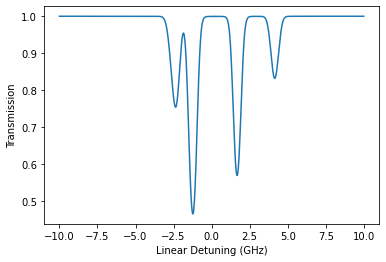

In [3]:
plt.plot(Detuning/1e3,S0)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Transmission')

C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Value of Stokes Parameter')

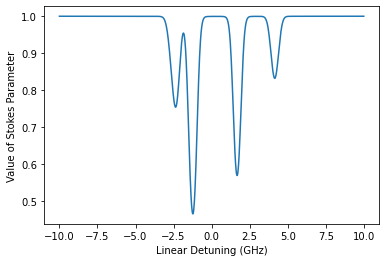

In [4]:
plt.plot(Detuning/1e3,S1)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Value of Stokes Parameter')

C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Value of Stokes Parameter')

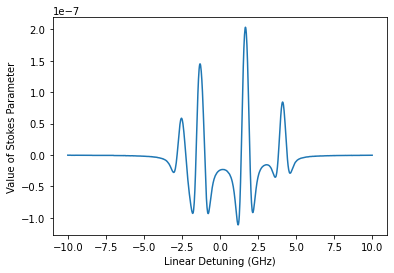

In [5]:
plt.plot(Detuning/1e3,S2)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Value of Stokes Parameter')

C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Value of Stokes Parameter')

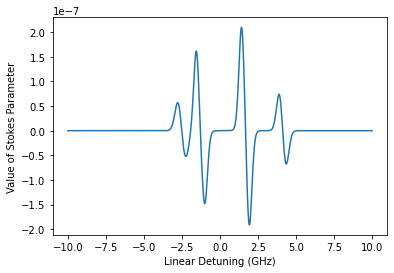

In [6]:
plt.plot(Detuning/1e3,S3)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Value of Stokes Parameter')

Text(0, 0.5, 'Horizontal Transmission')

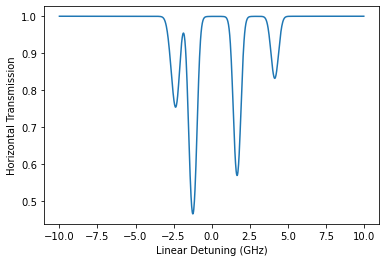

In [7]:
plt.plot(Detuning/1e3,Ix)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Horizontal Transmission')

Text(0, 0.5, 'Horizontal Transmission')

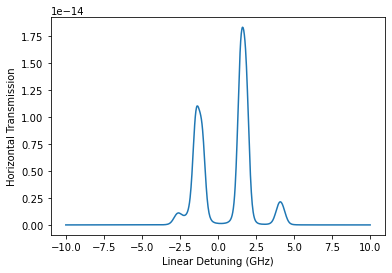

In [8]:
plt.plot(Detuning/1e3,Iy)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Horizontal Transmission')

C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Susceptibilities')

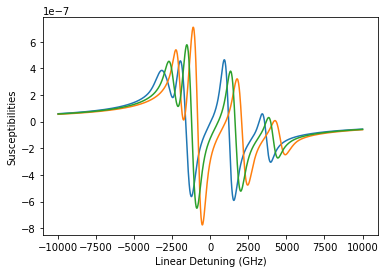

In [9]:
#Behind the Scenes Magic
#Calculating CHI
from elecsus.libs.spectra import calc_chi
p_dict={'Bfield':200} #Default p_dict is 75mm Rb cell on Rb D2 line at room temperature. We change Bfield to 200G.
[Left_Susceptibility,Right_Susceptibility,Z_Susceptibility]=calc_chi(Detuning,p_dict)
plt.plot(Detuning,Left_Susceptibility)
plt.plot(Detuning,Right_Susceptibility)
plt.plot(Detuning,Z_Susceptibility)
plt.xlabel('Linear Detuning (GHz)')
plt.ylabel('Susceptibilities')

In [10]:
#Behind the Scenes Magic
#Refractive Indices and Eigenmodes
from elecsus.libs.solve_dielectric import solve_diel #Note you will need changes to ElecSus I sent to Nicola to avoid 'time' error.
[X,n1,n2]=solve_diel(Left_Susceptibility,Right_Susceptibility,Z_Susceptibility,0,Bfield=200) #Note '0' is 'Btheta'=0 as we have mag field parallel with k-vector

C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\44755\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Linear Detuning (GHz)')

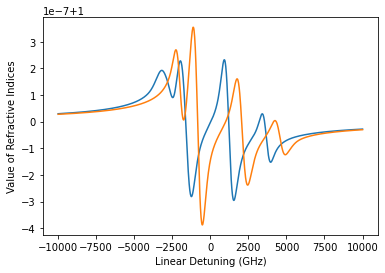

In [11]:
plt.plot(Detuning,n1)
plt.plot(Detuning,n2)
plt.ylabel('Value of Refractive Indices')
plt.xlabel('Linear Detuning (GHz)')
#n1 and n2 are two refractive indices. X is an array of the eigenmodes. See Rotondaro https://opg.optica.org/josab/abstract.cfm?uri=josab-32-12-2507 for details.

In [12]:
#Fraser Logue 24 08 2023